***importing libraries and functions***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

***importing dataset***

In [2]:
dataset = pd.read_excel(r'C:\Users\Tanisha Patil\Downloads\Dataset_CreditScoring.xlsx')

***data preparation***

In [3]:
#shape=(row,col)
dataset.shape

(3000, 30)

In [4]:
#display few starting rows of dataset
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [5]:
#dropping customer id column from the dataset
dataset = dataset.drop('ID', axis = 1)
dataset.shape

(3000, 29)

In [6]:
#explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [7]:
#filling missing values with mean
dataset = dataset.fillna(dataset.mean())

In [8]:
#exple missing values post missing values fixed
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [9]:
# count of good loans (0) and bad loans (1)
dataset['TARGET'].value_counts()

TARGET
0    2500
1     500
Name: count, dtype: int64

In [10]:
#data summary across 0 and 1
dataset.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


***Train Test Splitting***

In [11]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:28].values

In [12]:
# splitting dataset into training and test (in ratio of 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Risk Model Building***

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

***Model Performance***

In [15]:
print(confusion_matrix(y_test, y_pred))

[[482  16]
 [ 87  15]]


In [16]:
print(accuracy_score(y_test, y_pred))

0.8283333333333334


***Writing Output File***

In [17]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.04230096, 0.95769904],
       [0.93683282, 0.06316718],
       [0.70459693, 0.29540307],
       ...,
       [0.9724934 , 0.0275066 ],
       [0.44332485, 0.55667515],
       [0.86810657, 0.13189343]])

***Writing Model Output File***

In [18]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['false_prob_0', 'true_prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['TARGET_predictions'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv(r"C:\Users\Tanisha Patil\Downloads\Model_Prediction.xlsx")

warnings.simplefilter(action='ignore', category=FutureWarning)

dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.head()

,Actual Outcome,false_prob_0,true_prob_1,TARGET_predictions
0,1,0.042301,0.957699,1
1,0,0.936833,0.063167,0
2,0,0.704597,0.295403,0
3,0,0.908269,0.091731,0
4,0,0.866217,0.133783,0


***Plotting Graphs for Visualization***

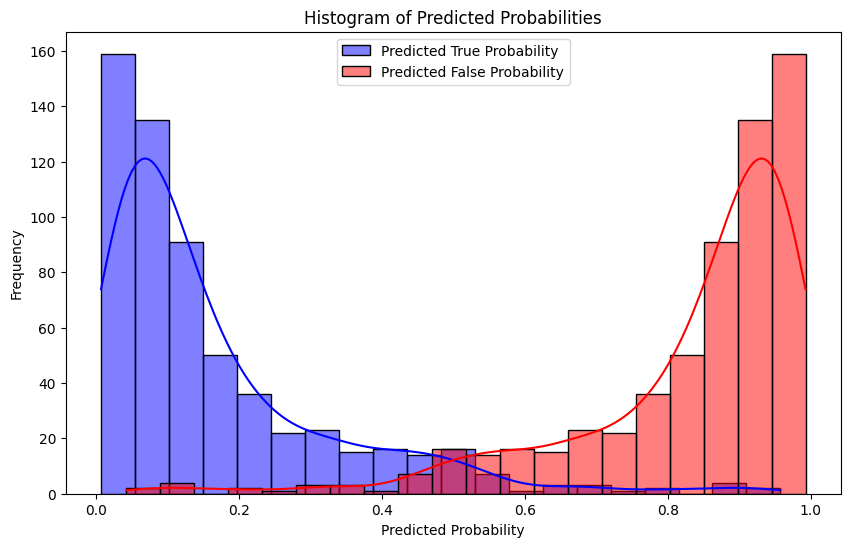

In [19]:
# Plot histogram of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(dfx['true_prob_1'], bins=20, kde=True, color='blue', label='Predicted True Probability')
sns.histplot(dfx['false_prob_0'], bins=20, kde=True, color='red', label='Predicted False Probability')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

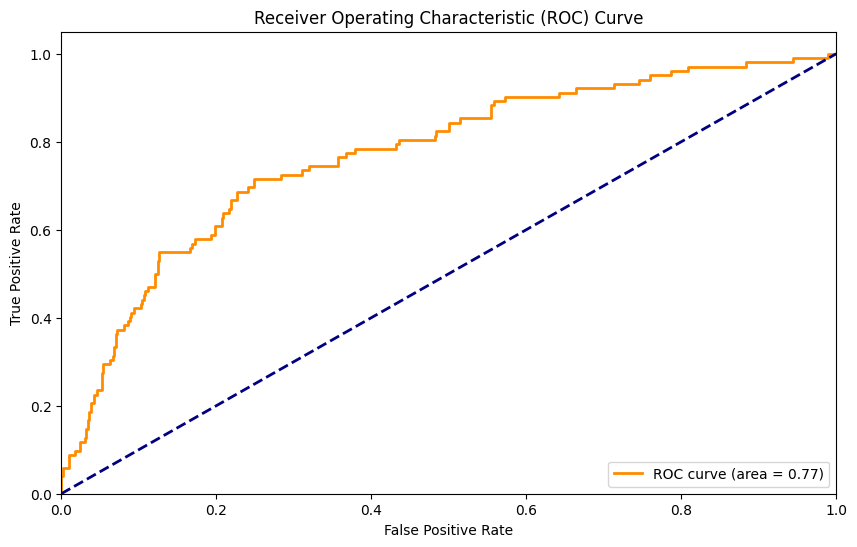

In [20]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(dfx['Actual Outcome'], dfx['true_prob_1'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()